In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Sample housing DataFrame structure
housing_df = pd.DataFrame({
    'price': np.random.uniform(100000, 1000000, 1500),
    'sqft': np.random.uniform(1000, 5000, 1500),
    'bedrooms': np.random.randint(1, 6, 1500),
    'bathrooms': np.random.uniform(1, 4, 1500),
    'location': np.random.choice(['urban', 'suburban', 'rural'], 1500),
    'house_type': np.random.choice(['single', 'townhouse', 'condo'], 1500),
    'age': np.random.randint(0, 50, 1500),
    'lot_size': np.random.uniform(2000, 10000, 1500),
    'garage': np.random.randint(0, 3, 1500),
    'condition': np.random.choice(['excellent', 'good', 'fair'], 1500)
})

# Your code here:


## Step 1: Handle categorical variables


In [2]:
#get column info
print(housing_df.info())

#get column unique values
print(housing_df.nunique())

cat_cols = housing_df.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {cat_cols}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       1500 non-null   float64
 1   sqft        1500 non-null   float64
 2   bedrooms    1500 non-null   int64  
 3   bathrooms   1500 non-null   float64
 4   location    1500 non-null   object 
 5   house_type  1500 non-null   object 
 6   age         1500 non-null   int64  
 7   lot_size    1500 non-null   float64
 8   garage      1500 non-null   int64  
 9   condition   1500 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 117.3+ KB
None
price         1500
sqft          1500
bedrooms         5
bathrooms     1500
location         3
house_type       3
age             50
lot_size      1500
garage           3
condition        3
dtype: int64
Categorical columns: ['location', 'house_type', 'condition']


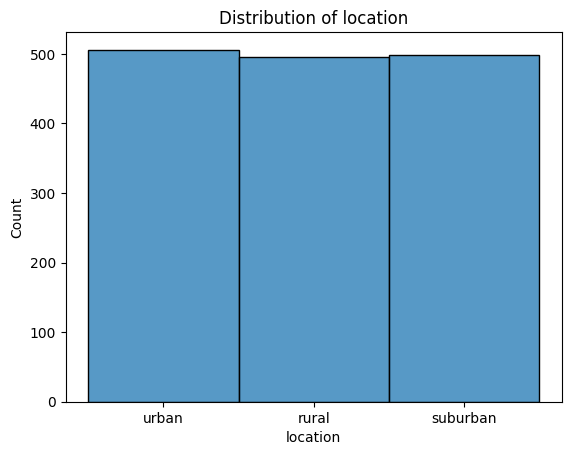

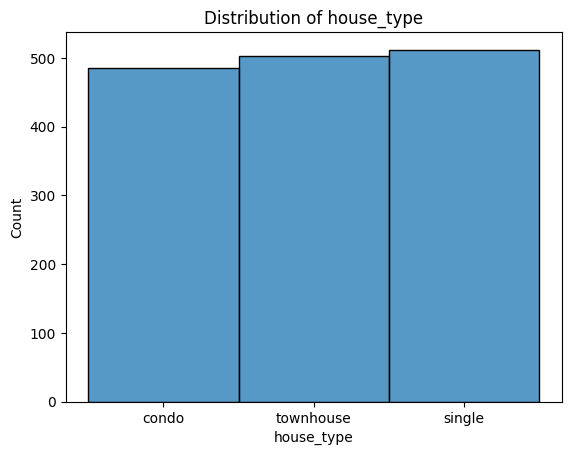

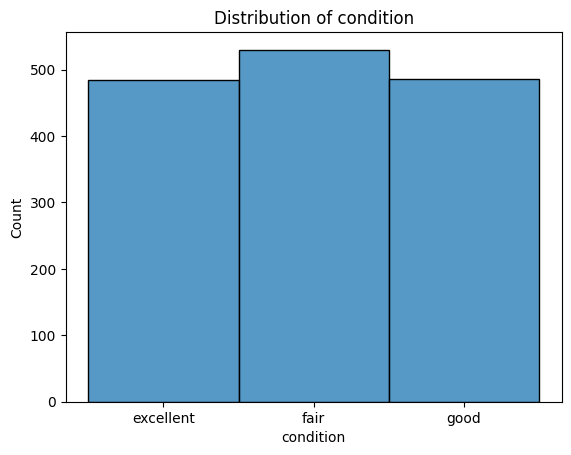

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
for feat in cat_cols:
  sns.histplot(data=housing_df, x=feat)
  plt.title(f'Distribution of {feat}')
  plt.show()

In [4]:
#encode categorical data

#encode onehot encoding for nominal data
housing_df = pd.get_dummies(housing_df, columns=cat_cols[:2], prefix=cat_cols[:2],dtype=int)

#encode ordinal data
housing_df['condition'] = housing_df['condition'].map({'excellent': 3, 'good': 2, 'fair': 1})

In [5]:
housing_df.head()

,price,sqft,bedrooms,bathrooms,age,lot_size,garage,condition,location_rural,location_suburban,location_urban,house_type_condo,house_type_single,house_type_townhouse
0,932807.180011,4922.354363,1,3.844560,26,2511.351752,0,3,0,0,1,1,0,0
1,166274.571281,4154.880293,3,2.768440,49,6854.087232,0,1,0,0,1,0,0,1
2,196886.501866,2088.133597,5,3.391875,9,5968.012807,1,2,1,0,0,1,0,0
3,568685.286342,1911.968522,2,3.970755,42,8752.866925,0,2,0,0,1,0,0,1
4,437259.646254,4396.501337,4,3.315501,24,6781.850350,2,2,1,0,0,1,0,0


In [9]:
#move condition to the end
move = housing_df.pop('condition')
housing_df.insert(len(housing_df.columns), 'condition', move)

housing_df.head()

,price,sqft,bedrooms,bathrooms,age,lot_size,garage,location_rural,location_suburban,location_urban,house_type_condo,house_type_single,house_type_townhouse,condition
0,932807.180011,4922.354363,1,3.844560,26,2511.351752,0,0,0,1,1,0,0,3
1,166274.571281,4154.880293,3,2.768440,49,6854.087232,0,0,0,1,0,0,1,1
2,196886.501866,2088.133597,5,3.391875,9,5968.012807,1,1,0,0,1,0,0,2
3,568685.286342,1911.968522,2,3.970755,42,8752.866925,0,0,0,1,0,0,1,2
4,437259.646254,4396.501337,4,3.315501,24,6781.850350,2,1,0,0,1,0,0,2


## Step 2: Create splits

```python

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled feature statistics:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).describe())
```

In [10]:
#split data
X = housing_df.drop('condition', axis=1) #assume condition is target
y = housing_df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1, 1000))

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

'''#Scale feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled feature statistics:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).describe())'''


Training set shape: (1200, 13)
Test set shape: (300, 13)


'#Scale feature\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\nprint("\nScaled feature statistics:")\nprint(pd.DataFrame(X_train_scaled, columns=X_train.columns).describe())'

In [11]:
#check train dataset
X_train.head()

,price,sqft,bedrooms,bathrooms,age,lot_size,garage,location_rural,location_suburban,location_urban,house_type_condo,house_type_single,house_type_townhouse
579,949221.817991,2159.589395,3,2.498684,13,8237.163051,0,0,0,1,0,0,1
863,298028.666559,1780.138206,4,2.302814,10,6293.968362,0,0,1,0,0,1,0
1263,624066.830578,4534.722046,2,3.517041,30,7193.554038,1,0,0,1,1,0,0
145,737638.251427,2294.958082,1,3.663607,18,4117.626518,2,0,1,0,0,1,0
585,570636.326147,2033.093614,2,3.710315,4,8391.216455,0,0,0,1,1,0,0


In [12]:
X_test.head()

,price,sqft,bedrooms,bathrooms,age,lot_size,garage,location_rural,location_suburban,location_urban,house_type_condo,house_type_single,house_type_townhouse
1035,162271.815645,3173.893066,5,2.991632,34,3753.264718,1,0,0,1,0,0,1
562,170440.318396,1858.841373,1,2.895994,48,3143.081116,1,1,0,0,0,0,1
884,531855.109202,2713.693025,5,3.081246,11,4354.610428,2,0,0,1,1,0,0
637,412621.202438,3841.855666,4,3.796431,41,5666.541540,2,0,0,1,1,0,0
973,170074.023179,2817.156480,4,2.261762,40,3015.098278,2,0,1,0,1,0,0
